In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as st 
import matplotlib.pyplot as plt 
import gc

In [2]:
dataset = pd.read_csv("data\googleplaystore.csv")
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [3]:
dataset.count()

App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Genres            10841
Last Updated      10841
Current Ver       10833
Android Ver       10838
dtype: int64

# Graphical Data Exploration

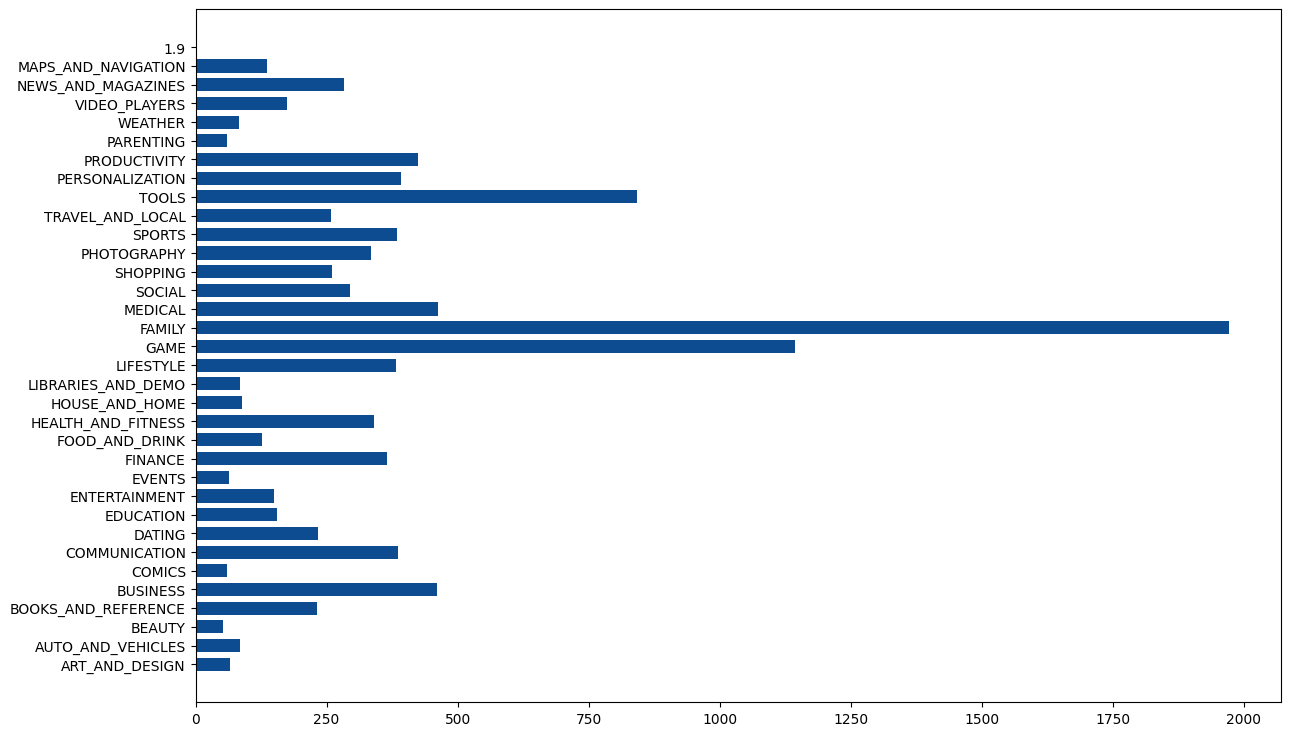

Frequency Mean:  318.8529411764706
Frequency Median:  246.0
Frequency Mode:  60


In [4]:
#Category Feature Exploration

fig, axs = plt.subplots(figsize=(14, 9))
axs.barh(dataset['Category'].unique(),  dataset['Category'].value_counts(sort=False), height=0.7, color='#0E4C92')
plt.show()
#dataset['Category'].value_counts()
print("Frequency Mean: ", dataset['Category'].value_counts().mean())
print("Frequency Median: ", dataset['Category'].value_counts().median())
print("Frequency Mode: ", dataset['Category'].value_counts().mode()[0])

- We can clearly see that the **Family** Category is the most frequent followed by **Games** and **Tools**
- There is a typo category which is **1.9** which was probably meant to be used as rating
- The Median Frequency is **246**, The Mean Frequency is **318.85**, The most common frequency is **60**
- Only **90%** of the dataset has Ratings

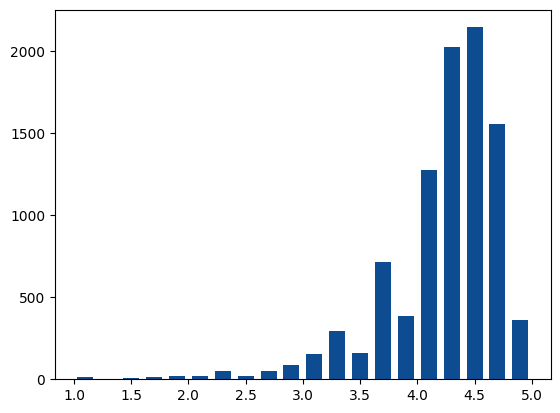

Ratings Mean:  4.191757420456972
Ratings Median:  4.3
Ratings Mode:  4.4
Ratings Std:  0.5152188586177886


In [5]:
#Exploring the Rating feature

ratings = dataset['Rating']

#dropping all the Nan Values  
ratings.dropna(inplace=True)

#dropping the Typo 19.0 in rating 
ratings.drop(index=ratings.loc[ratings == 19.0].index[0], inplace=True)

#print(ratings.value_counts())
plt.hist(ratings, bins=20, color='#0E4C92', rwidth=0.7, align='mid')
plt.show()

print("Ratings Mean: ", ratings.mean())
print("Ratings Median: ", ratings.median())
print("Ratings Mode: ", ratings.mode()[0])
print("Ratings Std: ", ratings.std())

- The Rating Distribution is approximately a **Negatively Skewed Distribution**
- Rating **Mean: 4.19** and **Std: 0.515**
- **Mode: 4.4** and **Median: 4.3** 

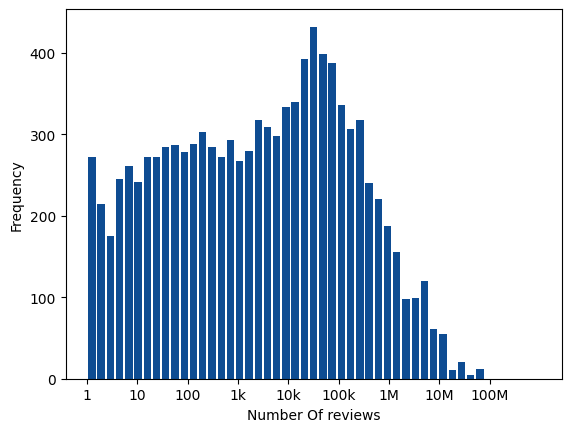

Number of No reviews:  596
Reviews Number Median:  2094.0
Reviews Number Mode:  0
Reviews Number Mean:  444388.6535374965
Reviews Number Max:  78158306


In [6]:
reviews = dataset['Reviews'].copy()
reviews.loc[reviews == '3.0M'] = '3000000'
reviews = reviews.astype(np.int64)

#Changing the 
bins = np.logspace(0, 9, 50)

plt.hist(reviews, bins=bins, color="#0E4C92", rwidth=0.8, align='mid')

plt.gca().set_xscale("log")
plt.xticks([1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000], ['1', '10', '100', '1k', '10k', '100k', '1M', '10M', '100M'])
plt.xlabel("Number Of reviews")
plt.ylabel("Frequency")
plt.show()

print("Number of No reviews: ", reviews.loc[reviews == 0].count())
print("Reviews Number Median: ", reviews.median())
print("Reviews Number Mode: ", reviews.mode()[0])
print("Reviews Number Mean: ", reviews.mean())
print("Reviews Number Max: ", reviews.max())


- All Data points have a value for reviews but 596 apps have 0 reviews
- The distribution is very scattered, the number of reviews range from **[0, 78 Million]**
- The **Median is 2094**, The **Mode is 0**
- The **Max number of reviews for an app is 78158306** for *Facebook* while the **Mean is 444K**

In [7]:
#function to transform the size into a numerical integer 

def sizes_to_int(size):
    if 'M' in size:
        return np.float32(size.split('M')[0])* (10**6)
    elif 'k' in size:
        return np.float32(size.split('k')[0])* (10**3)
    elif '+' in size:
        dig1 = size.split(',')[0]
        rest = size.split(',')[1]
        dig2 = rest.split('+')[0]
        return np.float32(dig1+dig2)
    else:
        return -1

sizes_to_int('1,000+')

1000.0

App Size Mean:  21514176.770500876
App Size Median:  18000000.0
Largest APP:  100000000


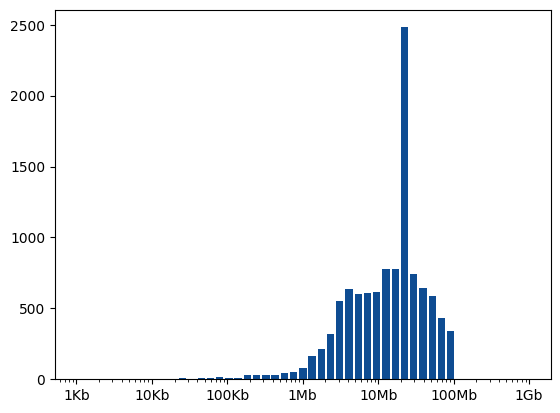

In [8]:
#Checking the Size of the apps
sizes = dataset['Size'].copy()

#transforming size into numerical data
sizes = sizes.apply(sizes_to_int).astype(np.int64)

#replacing varying size apps with the size mean
size_mean = sizes.loc[sizes != -1].mean()
sizes.loc[sizes == -1] = np.int32(size_mean)

print("App Size Mean: ", sizes.mean())
print("App Size Median: ", sizes.median())
print("Largest APP: ", sizes.max())


#graphicall representation of the data
bins = np.logspace(3, 9, 50)

plt.gca().set_xscale("log")
plt.xticks([1000, 10**4, 10**5, 10**6, 10**7, 10**8, 10**9], ['1Kb', '10Kb', '100Kb', '1Mb', '10Mb', '100Mb', '1Gb'])

plt.hist(sizes, bins=bins, color="#0E4C92", rwidth=0.8, align='mid')
plt.show()

- The Median Size of an APP is **21.5Mb**, the median size is **18Mb**
- Data Has been transformed into numerical values for future inferencing 
- The maximum treshold is 100Mb+, further accuracy is not provided

In [9]:
def installs_to_int(install):
    if install == 'Free':
        return 0
    install = install.replace(',', '')
    install = install.replace('+', '')
    return np.int64(install)

installs_to_int("1,000,000,000+")

1000000000

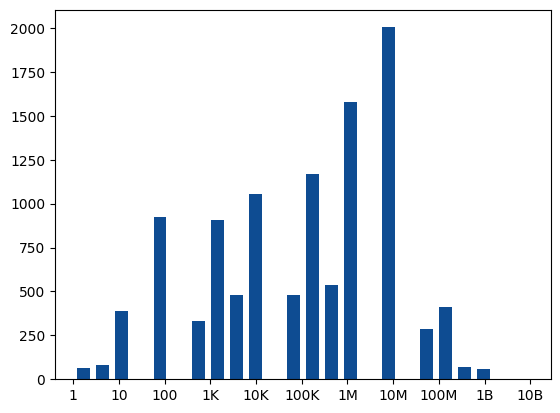

Downloads Mean:  15462912.414629648
Downloads Median:  100000.0
Downloads Mode:  1000000
Unique Values:  20


In [44]:
#Discovering the number of installs 

installs = dataset['Installs'].copy()
#cleaning wrong data
installs.loc[installs == 'Free'] = '0'

installs = installs.apply(installs_to_int)

bins = np.logspace(0, 10, 25)
plt.gca().set_xscale("log")

plt.hist(installs, bins=bins, rwidth=0.7, color="#0E4C92")
plt.xticks([1, 10, 100, 1000, 10**4, 10**5, 10**6, 10**7, 10**8, 10**9, 10**10], ['1', '10', '100', '1K', '10K', '100K', '1M', '10M', '100M', '1B', '10B'])
plt.show()

print("Downloads Mean: ", installs.mean())
print("Downloads Median: ", installs.median())
print("Downloads Mode: ", installs.mode()[0])
print("Unique Values: ", len(installs.unique()))

- The Median for downloads is **15.4 Million** Downloads
- The most common number of downloads is **1 Million**
- The data were transformed into **20** unique categorical numerical value for future predictions 

In [11]:
#freeing memory
# del installs
del ratings
del reviews
del sizes
gc.collect()

19439

In [12]:
def price_tonumerical(price):
    if '$' in price:
        return np.float32(price.replace('$', ''))
    else:
        return 0.0

0          10040
$0.99        148
$2.99        129
$1.99         73
$4.99         72
           ...  
$1.75          1
$14.00         1
$4.85          1
$46.99         1
$1.04          1
Name: Price, Length: 93, dtype: int64


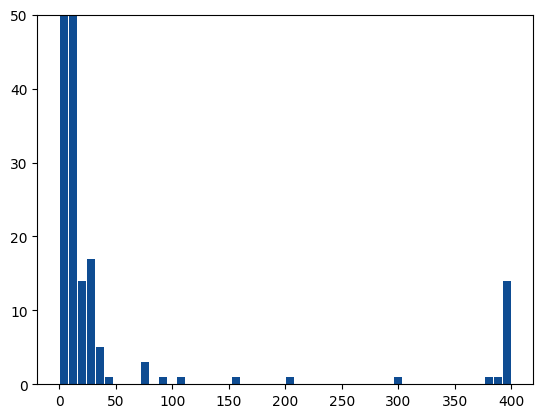

Median:  0.0
Mean:  1.0272732959133641
Free APPs:  10041
Most Expensive APP:  400.0


In [13]:
prices = dataset['Price'].copy()
print(prices.value_counts())
prices = prices.apply(price_tonumerical)

plt.hist(prices, bins=50, color="#0E4C92", rwidth=0.9, align='mid')
plt.ylim(0, 50)
plt.show()

print("Median: ", prices.median())
print("Mean: ", prices.mean())
print("Free APPs: ", prices.loc[prices == 0].count())
print("Most Expensive APP: ", prices.max())

- Most Apps are Free, **10041** to be precise
- The most expensive app cost **400$** (does not exist currently in the play store)
- The **Mean is 1.027$**

In [14]:
types = dataset['Type'].copy()

- 800 Apps are paid in this dataset, while 10040 are Free

In [15]:
content = dataset['Content Rating'].copy()
content.value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

- There are 6 categories of rating

### The features that are left will not be considered since for now their impact is not estimated to be very high on the desired Variable we want to predict

In [16]:
del bins, content, prices, types
gc.collect()

6398

# Sampling the dataset

### Random Sampling 

In [17]:
random_sample = dataset.sample(2000, random_state=42)
random_sample.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3457,Microsoft Outlook,PRODUCTIVITY,4.3,3252896,50M,"100,000,000+",Free,0,Everyone,Productivity,2-Aug-18,2.2.194,4.4 and up
3069,FotMob - Live Soccer Scores,SPORTS,4.7,410395,Varies with device,"10,000,000+",Free,0,Everyone,Sports,31-Jul-18,Varies with device,Varies with device
9657,EO Guide,HEALTH_AND_FITNESS,NaN,15,24M,"1,000+",Paid,$4.99,Everyone,Health & Fitness,23-Jul-18,1.0.4,4.1 and up
10714,FunForMobile Ringtones & Chat,SOCIAL,4.4,68358,7.2M,"5,000,000+",Free,0,Mature 17+,Social,7-May-16,3.22,4.1 and up
3963,Oral-B App,HEALTH_AND_FITNESS,3.3,14210,96M,"1,000,000+",Free,0,Everyone,Health & Fitness,19-Jul-18,6.0.1,5.0 and up


In [18]:
#stratified sampling 
installs_proportions = installs.value_counts(sort=False) / installs.value_counts(sort=False).sum()
dataset_tmp = dataset.copy()
dataset_tmp['Installs'] = dataset_tmp['Installs'].apply(installs_to_int)

sample_size = 2000
strat_sample = pd.DataFrame()

for prop, install in zip(installs_proportions, installs.unique()):
    strat_sub = dataset_tmp.loc[dataset_tmp['Installs'] == install].sample(int(prop * sample_size), random_state=42)
    strat_sample = pd.concat([strat_sample, strat_sub])

strat_sample.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4660,U-Report,SOCIAL,4.3,241,7.5M,10000,Free,0,Teen,Social,10-Apr-18,2.8.4,4.0.3 and up
10619,Hidden Object Florida Vacation Adventure Fun Game,FAMILY,3.7,126,45M,10000,Free,0,Everyone,Casual,18-Jun-18,1.4,4.0.3 and up
9066,Multiple Sclerosis Dx & Mgmt.,MEDICAL,4.5,131,60M,10000,Free,0,Everyone,Medical,25-Sep-17,5,4.4 and up
10466,Wi-Fi Networks,PRODUCTIVITY,4.2,115,1.4M,10000,Free,0,Everyone,Productivity,5-Oct-15,1.4,4.1 and up
1630,Chictopia,LIFESTYLE,4.1,360,4.6M,10000,Free,0,Everyone,Lifestyle,30-Apr-14,1.6.2,2.2 and up


In [19]:
strat_sample['Installs'].value_counts()

1000000       291
10000000      230
100000        215
10000         194
1000          167
5000000       138
100           132
500000         99
50000          88
5000           87
100000000      75
10             71
500            60
50000000       53
50             37
5              15
500000000      13
1              12
1000000000     10
0               2
Name: Installs, dtype: int64

In [20]:
#cluster sampling 
# dataset_tmp = dataset.loc[dataset['Category'] == '1.9']
# cluster_sample = dataset_tmp.groupby('Category')
# cluster_sample = cluster_sample[cluster_sample['Category'] == '1.9'].pop()
# cluster_sample = cluster_sample.sample(int(2000/33))
# cluster_sample.head()

# C4: Mean Comparaison

In [21]:
true_mean = installs.mean()
true_std = installs.std()
sample_mean = random_sample['Installs'].apply(installs_to_int).mean()
sample_std = random_sample['Installs'].apply(installs_to_int).std()
print("%35s" % (f"True Mean: {true_mean:.2f}"))
print("%35s" % (f"Random Sample Mean: {sample_mean:.2f}"))

             True Mean: 15462912.41
    Random Sample Mean: 16184663.99


### Hypothesis Testing
- The Population Variance is known and sample size > 30 so we use the z-test
- Hypothesis: 
u0: true_mean = sample_mean
u1: true_mean != sample_mean

In [22]:
alpha = 0.05
z = (sample_mean - true_mean)/true_std
p_val = 1 - st.norm.cdf(z)
print("Z value: ", z)
print("p value: ", p_val)
if p_val <= alpha/2:
    print("There is enough evidence to reject the Null hypothesis")
else:
    print("There isn't enough evidence to reject the null hypothesis")

Z value:  0.008488641549660683
p value:  0.49661356265215617
There isn't enough evidence to reject the null hypothesis


In [23]:
z_critic = st.norm(true_mean, true_std).ppf(1 - alpha/2)
# dist = st.norm(sample_mean, sample_std)
power = 1 - st.norm(sample_mean, sample_std).cdf(z_critic)
print("The test power is: ", power)

The test power is:  0.02359268951094362


In [36]:
import statsmodels.stats.power as pw

sample_size = pw.normal_sample_size_one_tail(diff=2, alpha=alpha, power=0.9, std_null=true_std)
print(f"Sample Size needed to detect a change of 2 in the means with power of 0.9:  {sample_size:.1f}")

Sample Size needed to detect a change of 2 in the means with power of 0.9:  15477756863045902.0


# C5: Bootstrapping

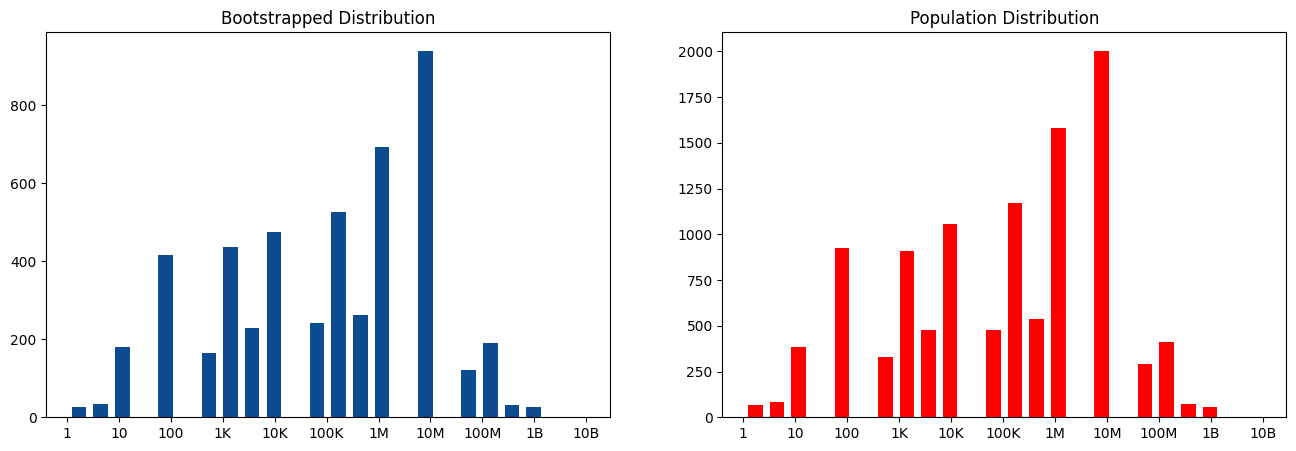

In [68]:
data = dataset['Installs'].apply(installs_to_int)
def bootstrapp(data, resampling=10000):
    data = np.array(data)
    bootstrapped_data = np.random.choice(data, size=resampling, replace=True)
    return bootstrapped_data

bootstrapped = bootstrapp(data, resampling=5000)
bins = np.logspace(0, 10, 25)


fig, axs = plt.subplots(ncols=2, figsize=(16, 5))

axs[0].set_xscale("log")
axs[1].set_xscale("log")

axs[1].set_xticks([1, 10, 100, 1000, 10**4, 10**5, 10**6, 10**7, 10**8, 10**9, 10**10], ['1', '10', '100', '1K', '10K', '100K', '1M', '10M', '100M', '1B', '10B'])
axs[0].set_xticks([1, 10, 100, 1000, 10**4, 10**5, 10**6, 10**7, 10**8, 10**9, 10**10], ['1', '10', '100', '1K', '10K', '100K', '1M', '10M', '100M', '1B', '10B'])

axs[0].hist(bootstrapped, bins=bins, rwidth=0.7, color="#0E4C92")
axs[1].hist(installs, bins=bins, rwidth=0.7, color="red")

axs[0].set_title("Bootstrapped Distribution")
axs[1].set_title("Population Distribution")


plt.show()

# C6: Proposed Models
- Decision Tree
- Multinomial Regression